# HUMAN ACTIVITY RECOGNITION USING SMART-WATCH DATA

# 

# ---------------------------------------------------------------------------------------------------------------

# Import basic libraries

In [1]:
# Importing libraries and resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Dataset

In [2]:
df = pd.read_csv("C:/Users/Ritesh B/Downloads/aw_fb_data/aw_fb_data.csv")

In [3]:
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [4]:
df.tail()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
6259,6260,3666,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0,fitbit,Running 7 METs
6260,6261,3667,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6261,6262,3668,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6262,6263,3669,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs
6263,6264,3670,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,fitbit,Running 7 METs



# Printing Data Info to check data types, null values and column names

In [5]:
# Printing the info of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

# Checking values within Categorical variables

In [6]:
print(df.device.unique())
print(df.activity.unique())


['apple watch' 'fitbit']
['Lying' 'Sitting' 'Self Pace walk' 'Running 3 METs' 'Running 5 METs'
 'Running 7 METs']


# Converting Categorical to Numerical data type

In [7]:
#Device
df['device'].replace(["apple watch", "fitbit"],
                        [0, 1], inplace=True)
#Activity
df['activity'].replace(['Lying' ,'Sitting' ,'Self Pace walk', 'Running 3 METs', 'Running 5 METs' ,'Running 7 METs'],
                       [0,1,2,3,4,5], inplace=True)



# Check to see if conversion was a success

In [8]:
print(df.device.unique())
print(df.activity.unique())

[0 1]
[0 1 2 3 4 5]


# ---------------------------------------------------------------------------------------------------------------

# Getting Summary Statistics

In [9]:
df.describe()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239,0.416347,2.416347
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530,0.492992,1.802307
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690,0.000000,0.000000
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260,0.000000,1.000000
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619,0.000000,2.000000
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562,1.000000,4.000000
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000,1.000000,5.000000


# Correlation for all variables

In [10]:
df.corr()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
Unnamed: 0,1.000000,0.449037,0.126539,-0.225263,-0.204343,-0.206349,-0.252668,-0.067211,0.447055,0.335736,-0.159582,-0.326790,-0.160754,0.379415,0.052239,-0.009939,0.095454,0.149589,0.853819,0.017054
X1,0.449037,1.000000,0.299608,-0.465047,-0.369403,-0.262244,0.138594,0.181164,-0.156275,0.055878,-0.067306,-0.138498,-0.130887,-0.060269,0.280584,0.308903,0.298053,0.014122,-0.068772,0.020734
age,0.126539,0.299608,1.000000,-0.236032,-0.518798,-0.152317,0.006394,-0.007665,-0.064661,-0.061169,-0.002541,-0.001528,-0.022833,0.068108,0.009318,0.071297,0.058018,-0.045816,-0.033170,0.002323
gender,-0.225263,-0.465047,-0.236032,1.000000,0.735852,0.580446,-0.069719,-0.093476,0.071875,-0.051779,-0.051111,0.014608,-0.082235,-0.039968,-0.032913,-0.064392,-0.057793,0.022257,0.007264,0.017950
height,-0.204343,-0.369403,-0.518798,0.735852,1.000000,0.693504,0.025729,-0.123519,0.034447,-0.091422,-0.069491,0.049100,-0.028330,-0.031292,-0.103492,-0.124562,-0.090542,-0.075755,-0.019559,0.008925
weight,-0.206349,-0.262244,-0.152317,0.580446,0.693504,1.000000,0.045389,-0.064317,-0.023612,-0.072294,-0.156601,-0.052906,-0.014345,-0.064750,-0.054192,-0.064944,-0.009806,-0.008666,-0.087760,0.014848
steps,-0.252668,0.138594,0.006394,-0.069719,0.025729,0.045389,1.000000,0.164084,-0.250973,-0.090433,0.021579,0.086400,0.083964,-0.229163,0.102876,0.144211,0.112486,0.023798,-0.375660,0.041894
hear_rate,-0.067211,0.181164,-0.007665,-0.093476,-0.123519,-0.064317,0.164084,1.000000,-0.141972,-0.068879,0.060427,0.036693,0.382275,-0.174136,0.723648,0.780478,0.280313,0.064759,-0.211143,0.219177
calories,0.447055,-0.156275,-0.064661,0.071875,0.034447,-0.023612,-0.250973,-0.141972,1.000000,0.255145,0.001069,-0.105678,-0.055703,0.208055,-0.101669,-0.164999,-0.148178,0.119908,0.593476,0.192236
distance,0.335736,0.055878,-0.061169,-0.051779,-0.091422,-0.072294,-0.090433,-0.068879,0.255145,1.000000,-0.056429,-0.296744,-0.320791,0.081354,0.170087,0.066103,0.296582,0.653995,0.354347,0.027693


# Plotting a Heatmap with the Correlation Matrix

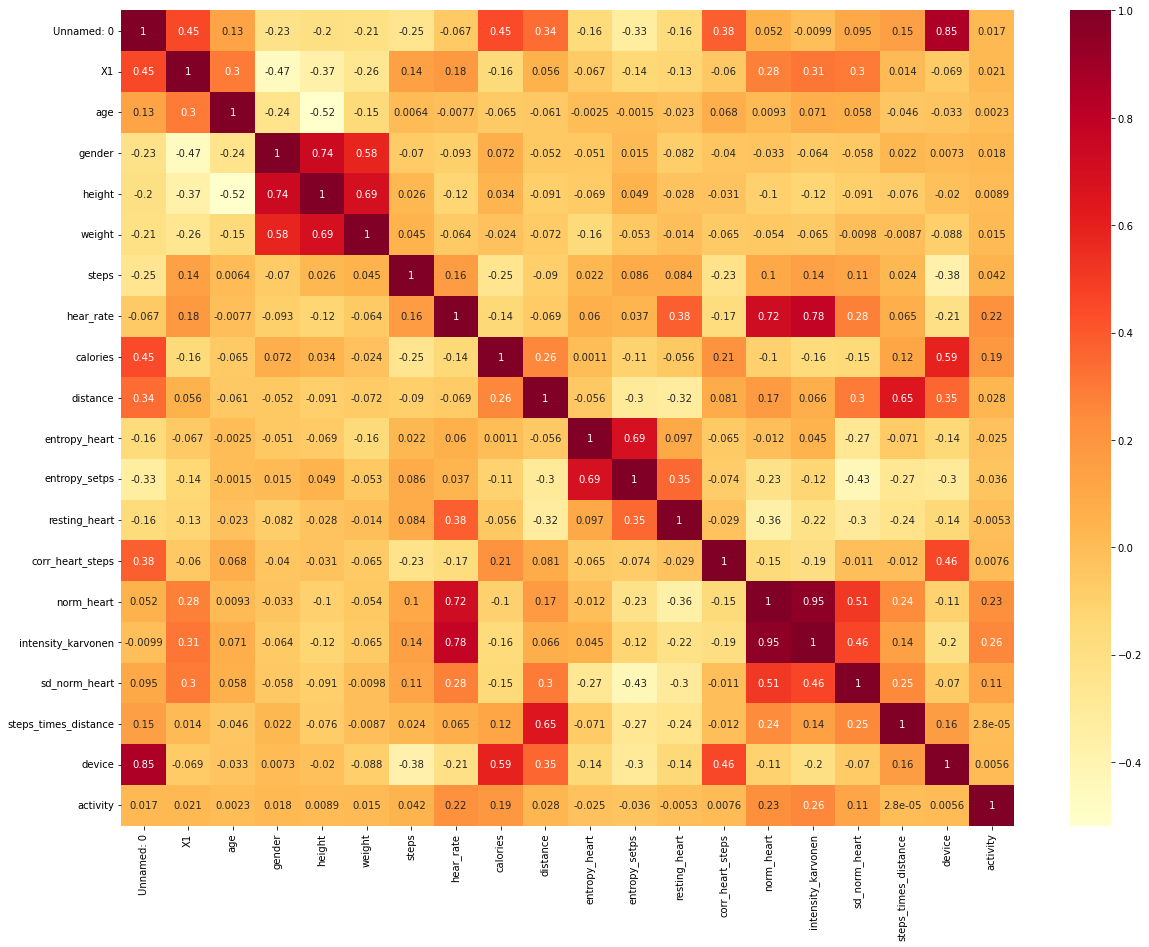

In [11]:
 fig = plt.figure(figsize = (20,15))
plot = sns.heatmap(df.corr(), cmap="YlOrRd", annot = True)

# Visualizing data distribution via Histograms

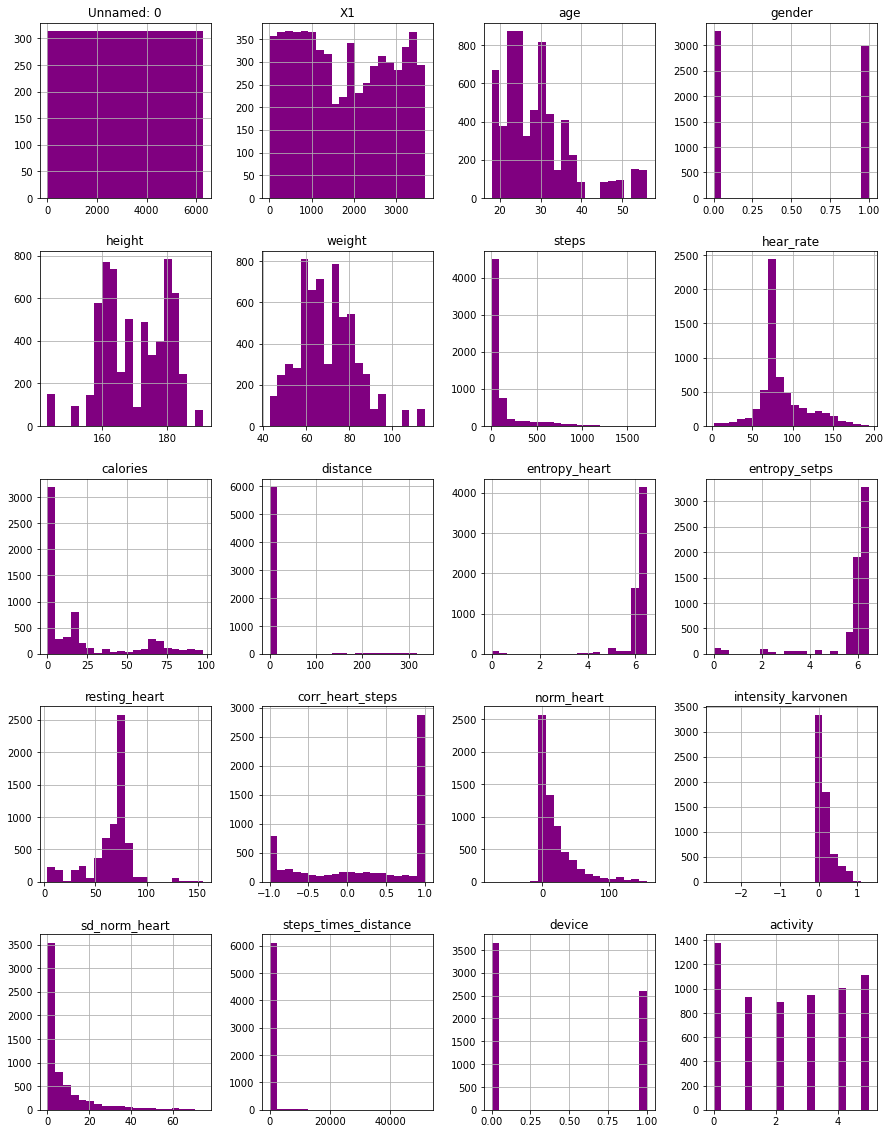

In [12]:
df.hist(bins = 20, figsize = (15,20), color = 'purple')
plt.show()

# Scatter-Plot to see relationship and spread of variables

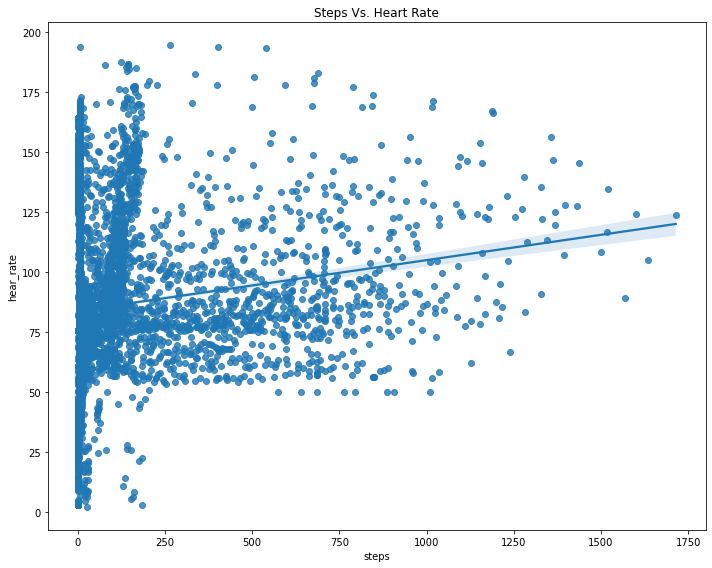

In [13]:
plt.figure(figsize=(10,8))
sns.regplot(data = df, x='steps', y='hear_rate')
plt.title('Steps Vs. Heart Rate')
plt.tight_layout()

# Bar Chart 'Age v/s Resting Heart'

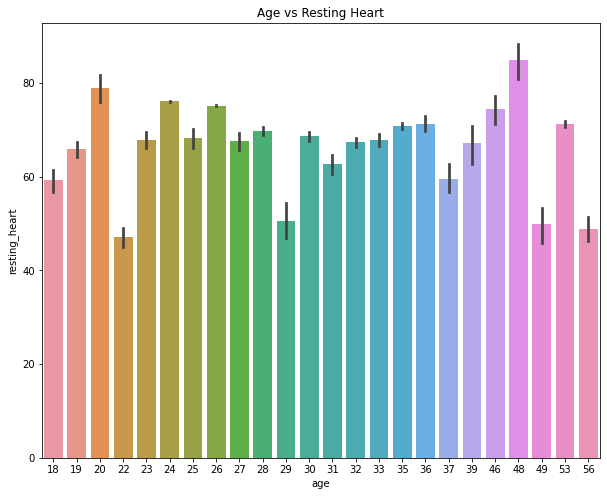

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'age', y = 'resting_heart', data = df)
plt.title('Age vs Resting Heart')
plt.show()

# Histograms to check normheart rate distribution while performing different activities

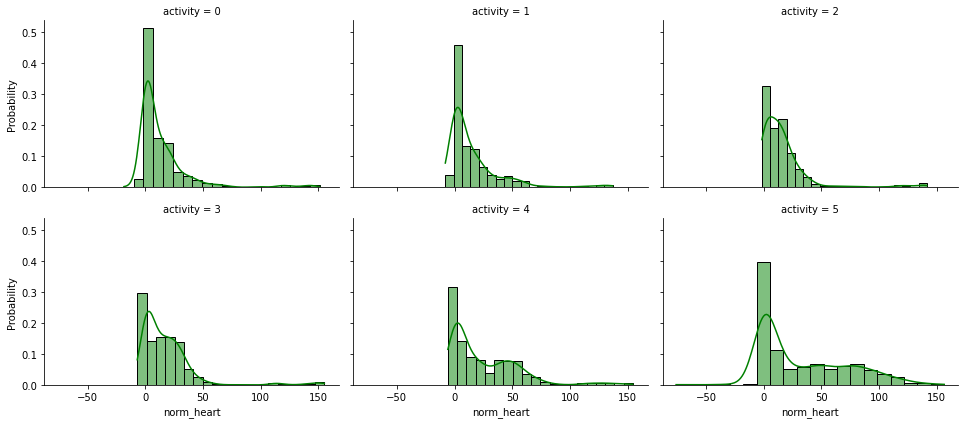

In [15]:


g = sns.FacetGrid(data = df,col='activity', col_wrap=3,height=3,aspect=1.5,)
g.map(sns.histplot,'norm_heart', kde =True , color = 'green', stat='probability', bins=20)
plt.tight_layout()

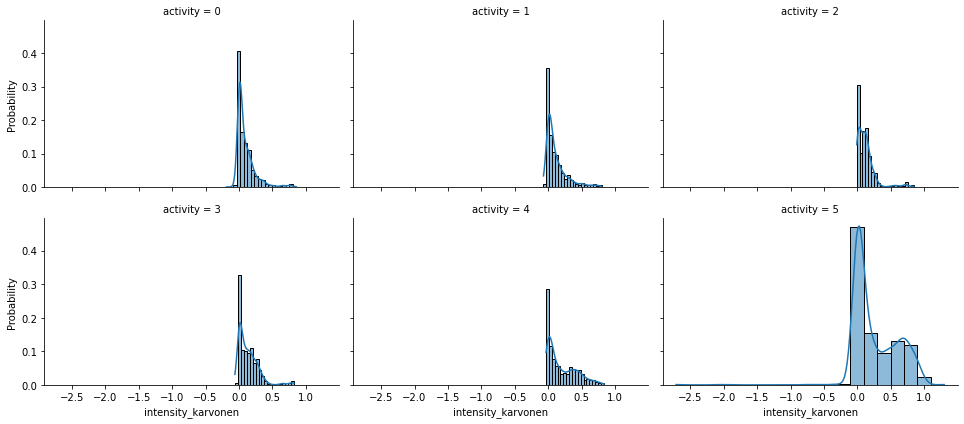

In [16]:
g1 = sns.FacetGrid(data = df,col='activity', col_wrap=3,height=3,aspect=1.5,)
g1.map(sns.histplot,'intensity_karvonen', kde =True , color = '#1f77b4', stat='probability',bins=20)
plt.tight_layout()

# Creating a new attribute and merging the dataframe

In [17]:
#Create unique ID to match with person
unique_id_list = ['age','gender','height','weight']

#Drop Duplicates
df_person = df[unique_id_list].drop_duplicates()

#Reset Index
df_person.reset_index(drop=True,inplace=True)

#Creating a new attribute and merging it with the existing dataset
df_person['person'] = list(range(df_person.shape[0]))
df = pd.merge(df,df_person,on=unique_id_list)

In [18]:
# Calculating BMI and calories_bmi, as these will become important factors to predict and classify activities
df['bmi'] = df['weight']/(df['height']**2) * 10_000 
df['calories_bmi'] =df['calories']/df['bmi']

# Creating a new dataframe that will contain data from apple watch only

In [19]:
df_a = df[df['device']=='apple watch'].copy()
df_a.reset_index(drop=True,inplace=True)

In [20]:
df_a = df[df['device']== 0].copy()
df_a.reset_index(drop=True,inplace=True)

In [21]:
df_a.tail()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,...,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,person,bmi,calories_bmi
3651,3652,3666,46,0,157.5,71.4,163.000000,157.250000,0.7015,0.075200,...,1.0,77.828205,0.822898,7.270204,12.257600,0,5,48,28.783069,0.024372
3652,3653,3667,46,0,157.5,71.4,6.666667,157.307692,0.7015,0.075475,...,1.0,77.885897,0.823508,1.000000,0.503167,0,5,48,28.783069,0.024372
3653,3654,3668,46,0,157.5,71.4,6.750000,156.250000,0.7320,0.075695,...,1.0,76.828205,0.812325,1.000000,0.510941,0,5,48,28.783069,0.025432
3654,3655,3669,46,0,157.5,71.4,6.791667,158.090909,0.6125,0.077270,...,1.0,78.669114,0.831789,1.000000,0.524792,0,5,48,28.783069,0.021280
3655,3656,3670,46,0,157.5,71.4,6.750000,157.230769,0.6710,0.075965,...,1.0,77.808974,0.822695,1.000000,0.512764,0,5,48,28.783069,0.023312


# 

# ---------------------------------------------------------------------------------------------------------------

# 

# Prepare TRAIN & TEST DATA
    # IMPORT ALL NECESSARY LIBRARIES

In [22]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier



In [23]:
# Break into Test Train Split
# predictor_list = ['calories','distance','norm_heart', 'intensity_karvonen','sd_norm_heart','hear_rate']
predictor_list = [col for col in df.columns if col not in ['activity','age', 'gender', 'height', 'weight','person','bmi','device','resting_heart']]
X = df_a[predictor_list]
y = df_a['activity']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42 , stratify=y)

# Standardize the dataset Using the standard scaler function

In [24]:
sc = StandardScaler()
sc.fit(X_train)  #fit the scaling function to your train dataset
X_train_std = sc.transform(X_train) #create a new object that contains the scaled and transformed data for the train dataset
X_test_std = sc.transform(X_test)  #repeat same for test data. 
#Using transform function, the parameters generated using the fit() method are now used and applied to the training data
#to update them.


# Perform PCA (Principal Component Analysis)

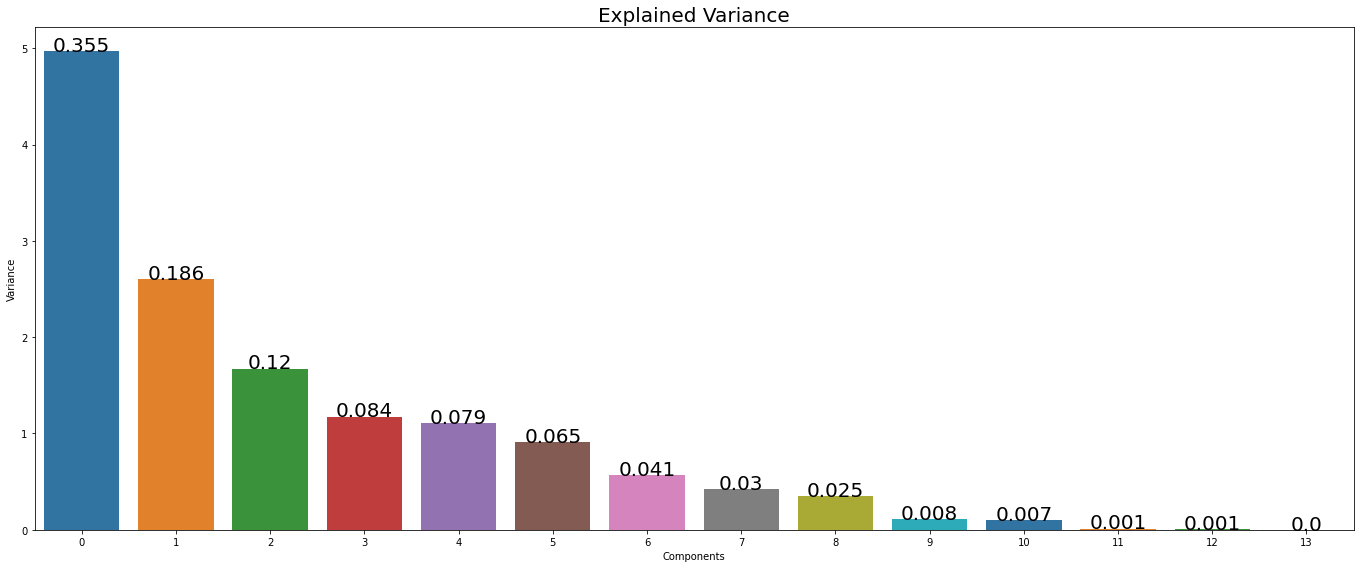

In [25]:
plt.figure(figsize = (19,8)) # plt fig size

pca = PCA()  # define the PCA() function to an object named pca 

pca.fit(X_train_std) #fit your data to the object with contains PCA function

#Specifying the range for the components (components are nothing but new variables constructed along the PCA process)
components = range(pca.n_components_)

#pca.explained_variance_ will tell us the measure of, how much variation does an attribute contribute to the variance
#Have these components and explained variance fed into a dataframe using df
#then create an object with any name, plot_comp_df in this case, which will contain the above dataframe
plot_comp_df = pd.DataFrame({'Components':components, 'Variance':pca.explained_variance_}) 

#Self explanatory barplot function
bp = sns.barplot(x = 'Components',y = 'Variance',data = plot_comp_df , palette = 'tab10') 

# define the number of digits you want to show post decimal point
variance_ratios = [round(float(ratio),3) for ratio in pca.explained_variance_ratio_]

font = {'color':  'black',
        'weight': 'normal',        #Define your styling for the chart
        'size': 20,
        }


for component,variance,ratio in zip(components , pca.explained_variance_ ,variance_ratios):
    bp.text(x=component,y=variance,s=ratio,ha="center",fontdict = font) #Defining axis, positioning and styling

plt.title('Explained Variance',fontdict = font)  #Setting title for the chart
plt.tight_layout()               


In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3546932 , 0.54053397, 0.66005475, 0.74392773, 0.8232856 ,
       0.88833435, 0.92892426, 0.95895246, 0.98398921, 0.99164938,
       0.99856894, 0.99947194, 0.99999977, 1.        ])

# Heat Map for the PCA Components

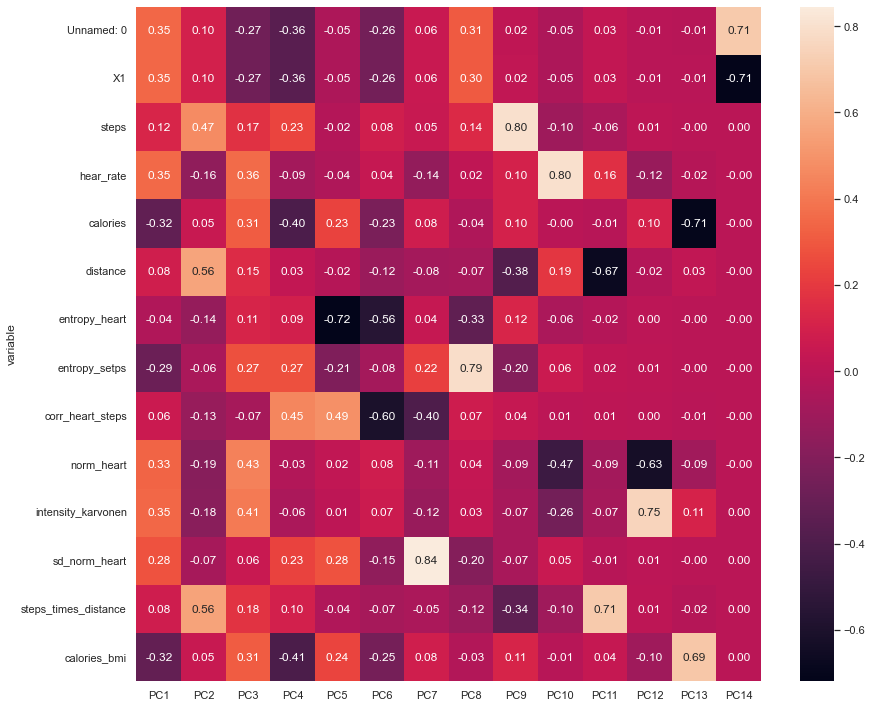

In [27]:
sns.set(font_scale=1)
plt.figure(figsize = (13,10))
loadings = pca.components_
n_comp = pca.n_features_
pc_list = ["PC"+str(i) for i in range(1,n_comp+1)]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X_train.columns.values
loadings_df = loadings_df.set_index('variable')
sns.heatmap(loadings_df ,annot=True,fmt='.2f')
plt.tight_layout()

# 

# --------------------------------------------------------------------------------------------------------------

   #                                     Building Clasiification Models

# --------------------------------------------------------------------------------------------------------------

# Logistic Regression()
        # Specify train & test data
        # Predict Accuracy
        # Print a classification report (precision, recall and f1 scores)
        # Calculate and plot the Confusion Matrix

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Ritesh B\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = logreg.predict(X_test)
print(format(logreg.score(X_test, y_test)))

0.28167730173199634


In [30]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.60      0.37       234
           1       0.03      0.01      0.01       164
           2       0.00      0.00      0.00       151
           3       0.09      0.01      0.01       176
           4       0.18      0.25      0.21       185
           5       0.41      0.65      0.51       187

    accuracy                           0.28      1097
   macro avg       0.17      0.25      0.19      1097
weighted avg       0.18      0.28      0.20      1097



C:\Users\Ritesh B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ritesh B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ritesh B\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

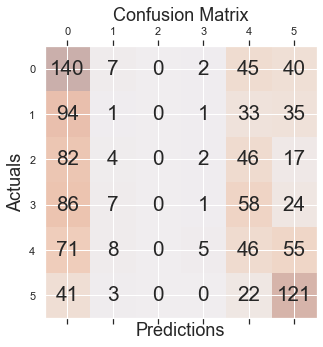

In [32]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

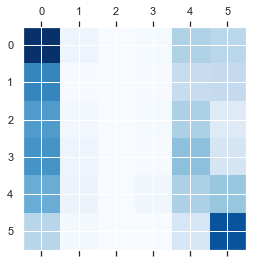

In [33]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues)

# --------------------------------------------------------------------------------------------------------------

# Support Vector Classifier (SVC)
        # Specify kernal and random state for the SVC () function
        # specify data
        # Predict Accuracy
        # Print a classification report (precision, recall and f1 scores)
        # Calculate and plot the Confusion Matrix

In [34]:
# Fit the SVC model
svm_clf = SVC(gamma="auto", kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [35]:
# Get the predictions
y_pred1 = svm_clf.predict(X_test)
print(format(svm_clf.score(X_test, y_test)))

0.4886052871467639


In [36]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.29      0.94      0.44       234
           1       0.75      0.20      0.32       164
           2       0.96      0.58      0.72       151
           3       0.98      0.49      0.66       176
           4       0.90      0.38      0.54       185
           5       0.97      0.20      0.34       187

    accuracy                           0.49      1097
   macro avg       0.81      0.47      0.50      1097
weighted avg       0.78      0.49      0.49      1097



In [37]:
# Calculate the confusion matrix
conf_matrix_svc = confusion_matrix(y_true=y_test, y_pred=y_pred1)

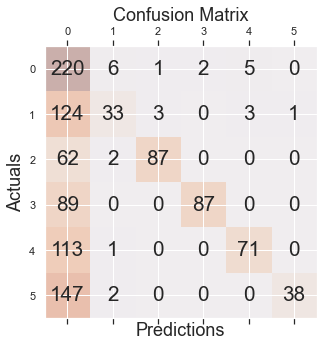

In [38]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_svc, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_svc.shape[0]):
    for j in range(conf_matrix_svc.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_svc[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


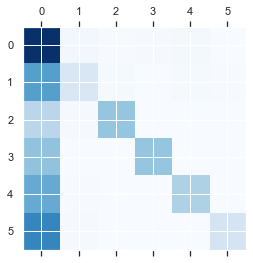

In [39]:
plt.matshow(conf_matrix_svc, cmap=plt.cm.Blues)

# ---------------------------------------------------------------------------------------------------------------

# Random Forest Classifier 
        # Specify parameters for the function
        # Specify data
        # Predict Accuracy
        # Print a classification report (precision, recall and f1 scores)
        # Calculate and plot the Confusion Matrix

In [40]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred2 = rnd_clf.predict(X_test)
print(format(rnd_clf.score(X_test, y_test)))

0.8413855970829535


In [42]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       234
           1       0.79      0.73      0.76       164
           2       0.87      0.87      0.87       151
           3       0.87      0.88      0.87       176
           4       0.79      0.85      0.82       185
           5       0.94      0.89      0.91       187

    accuracy                           0.84      1097
   macro avg       0.84      0.84      0.84      1097
weighted avg       0.84      0.84      0.84      1097



In [43]:
# Calculate the confusion matrix
conf_matrix_rnd = confusion_matrix(y_true=y_test, y_pred=y_pred2)

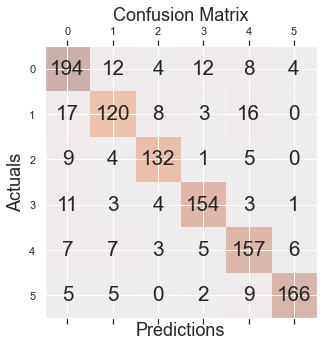

In [44]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_rnd, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_rnd.shape[0]):
    for j in range(conf_matrix_rnd.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_rnd[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

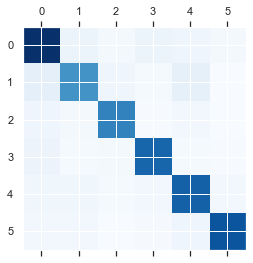

In [45]:
plt.matshow(conf_matrix_rnd, cmap=plt.cm.Blues)

# ---------------------------------------------------------------------------------------------------------------

# Summary of the model performances
    # Logistic Regression - 28% Accuracy
    # Support Vector - 48% Accuracy
    # Random Forest - 84% Accuracy

# --------------------------------------------------------------------------------------------------------------